# Analyse BERT-generated results

In [1]:
import pandas as pd
import os
from os.path import join as opj

In [2]:
def make_df(candidate_file, gold_file):
    candidate_lines = []
    gold_lines = []
    with open(candidate_file, 'r', encoding='utf-8') as c_file, open(gold_file, 'r', encoding='utf-8') as g_file:
        candidate_lines = c_file.readlines()
        gold_lines = g_file.readlines()
    step_df = pd.DataFrame({'summary': candidate_lines, 'reference':gold_lines})
    return step_df

In [3]:
def match_data(csv_dir, summs_dir):
    step_to_df = dict()
    for root, _, files in os.walk(summs_dir):
        for file in files:
            if file.endswith('.candidate'):
                candidate_file = opj(root, file)
                gold_file = candidate_file.replace('.candidate', '.gold')
                step_df = make_df(candidate_file, gold_file)
                step_num = int(file[file.find('_step')+5:file.find('.')])
                step_df['length_words'] = step_df['summary'].str.split().str.len()
                scores_sf = pd.read_csv(opj(csv_dir, file.replace('results_step', 'test_res_bertsum_s').replace('.candidate','_2408_1930.csv')))
                total_df = pd.concat([step_df, scores_sf], axis=1)
                step_to_df[step_num] = total_df
    step_to_df = {k: step_to_df[k] for k in sorted(step_to_df.keys())}
    return step_to_df

In [4]:
step_to_df = match_data(opj(os.getcwd(), 'results'), opj(os.getcwd(), 'results', 'bert_summaries'))

In [5]:
step_to_df[50000].describe()

,length_words,rouge1_pr,rouge1_re,rouge1_f1,rouge2_pr,rouge2_re,rouge2_f1,rougeL_pr,rougeL_re,rougeL_f1,rougeLsum_pr,rougeLsum_re,rougeLsum_f1
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,55.146789,0.730228,0.525002,0.597122,0.619436,0.439211,0.502614,0.579157,0.417206,0.474132,0.579157,0.417206,0.474132
std,12.749601,0.200296,0.150173,0.147536,0.255170,0.184545,0.198035,0.205681,0.158527,0.161902,0.205681,0.158527,0.161902
min,32.000000,0.229500,0.193000,0.229200,0.000000,0.000000,0.000000,0.130400,0.105300,0.125000,0.130400,0.105300,0.125000
25%,46.000000,0.625000,0.402200,0.489800,0.444400,0.305100,0.377000,0.440700,0.301100,0.372100,0.440700,0.301100,0.372100
50%,53.000000,0.740000,0.533300,0.617600,0.645800,0.456500,0.517500,0.577500,0.400000,0.458300,0.577500,0.400000,0.458300
75%,63.000000,0.877200,0.619000,0.705900,0.787200,0.573000,0.644700,0.734700,0.525400,0.610200,0.734700,0.525400,0.610200
max,109.000000,1.000000,0.973000,0.900000,1.000000,0.944400,0.875000,1.000000,0.973000,0.885700,1.000000,0.973000,0.885700


In [6]:
step_to_df[5000].describe()

,length_words,rouge1_pr,rouge1_re,rouge1_f1,rouge2_pr,rouge2_re,rouge2_f1,rougeL_pr,rougeL_re,rougeL_f1,rougeLsum_pr,rougeLsum_re,rougeLsum_f1
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,55.192661,0.730603,0.529904,0.598784,0.619233,0.444604,0.505114,0.592063,0.430660,0.486137,0.592063,0.430660,0.486137
std,13.210880,0.191851,0.163549,0.150111,0.247644,0.194447,0.200104,0.208072,0.175374,0.170273,0.208072,0.175374,0.170273
min,31.000000,0.203400,0.182900,0.255300,0.053600,0.056600,0.056600,0.084700,0.097600,0.106400,0.084700,0.097600,0.106400
25%,47.000000,0.606600,0.397100,0.500000,0.463400,0.301900,0.378400,0.452400,0.297000,0.348500,0.452400,0.297000,0.348500
50%,54.000000,0.754700,0.537600,0.629400,0.652200,0.474400,0.550300,0.571400,0.409400,0.477900,0.571400,0.409400,0.477900
75%,62.000000,0.864900,0.628900,0.708000,0.783300,0.567600,0.630600,0.736800,0.558800,0.618600,0.736800,0.558800,0.618600
max,105.000000,1.000000,1.000000,0.910000,1.000000,0.969700,0.878800,1.000000,1.000000,0.810300,1.000000,1.000000,0.810300


<Axes: >

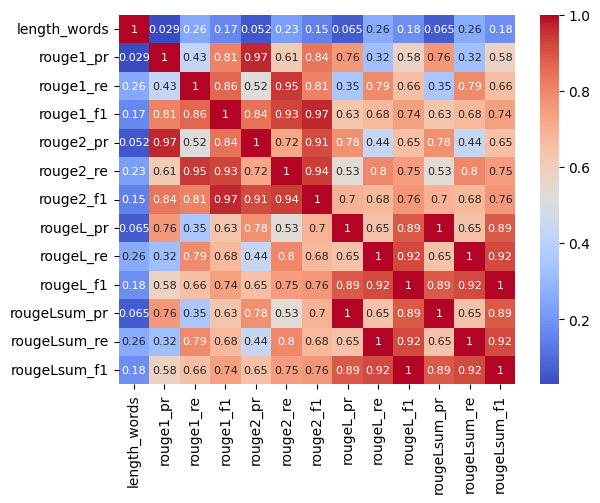

In [7]:
import seaborn as sns
sns.heatmap(step_to_df[50000].select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', annot_kws={"size":8})

In [8]:
num_cols = [col for col in step_to_df[5000].columns if 'rouge' in col]

In [9]:
for col in num_cols:
    rouge1_f1s = {k: float(v[col].mean()) for k, v in step_to_df.items()}
    best_step = max(rouge1_f1s, key=rouge1_f1s.get)
    print("Best", col, "mean score: step", best_step, "=", round(rouge1_f1s[best_step],5))


Best rouge1_pr mean score: step 40000 = 0.75001
Best rouge1_re mean score: step 40000 = 0.54331
Best rouge1_f1 mean score: step 40000 = 0.61496
Best rouge2_pr mean score: step 40000 = 0.64967
Best rouge2_re mean score: step 45000 = 0.46444
Best rouge2_f1 mean score: step 40000 = 0.52778
Best rougeL_pr mean score: step 5000 = 0.59206
Best rougeL_re mean score: step 5000 = 0.43066
Best rougeL_f1 mean score: step 5000 = 0.48614
Best rougeLsum_pr mean score: step 5000 = 0.59206
Best rougeLsum_re mean score: step 5000 = 0.43066
Best rougeLsum_f1 mean score: step 5000 = 0.48614


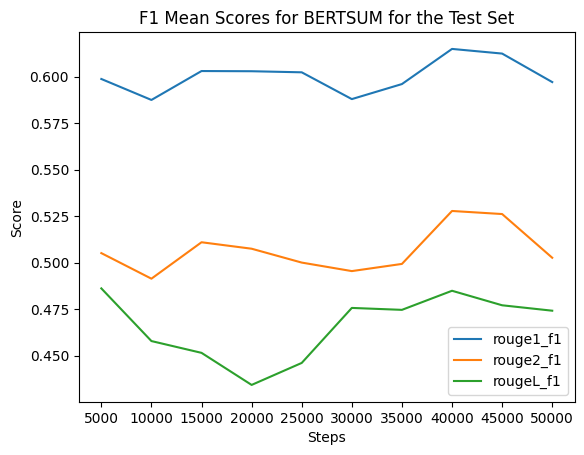

In [16]:
# step_to_df[50000]['index'] = step_to_df[50000].index
from matplotlib import pyplot as plt
cols_to_display = ['rouge1_f1', 'rouge2_f1', 'rougeL_f1']
for col in cols_to_display:
    plt.plot(range(0, len(step_to_df.keys())), [step_to_df[steps][col].mean() for steps in range(5000, 50001, 5000)], label=col)
# plt.scatter(step_to_df[50000].index, step_to_df[50000].sort_values(by='rougeL_f1')['rougeL_f1'])
plt.xlabel("Steps")
plt.ylabel("Score")
plt.xticks(ticks=range(0,10,1), labels=range(5000, 50001, 5000))
plt.title("F1 Mean Scores for BERTSUM for the Test Set")
plt.legend()
plt.show()
